### Machine Learning Project - **Alice DEVILDER**

# Twitter Climate Change Sentiment Analysis

This project focuses on the sentiment analysis of tweets related to climate change by building and comparing machine learning models to classify whether a person believes in climate change based on novel tweet data. 
The dataset used for this analysis was collected as part of a project funded by *a Canada Foundation for Innovation JELF Grant* awarded to **Chris Bauch** at the *University of Waterloo*.  
It corresponds to the [Twitter Climate Change Sentiment Dataset](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset) from Kaggle .

### Some context

Climate change remains a topic of significant global concern, prompting ongoing discussions and debates on social media platforms like Twitter. With the proliferation of climate-related content online, distinguishing between different perspectives and attitudes towards climate change is crucial for understanding public sentiment and informing policy decisions.

Twitter serves as a valuable source of real-time data reflecting diverse viewpoints on climate change, ranging from support for climate action to skepticism or denial of its existence. By leveraging machine learning techniques, this project aims to analyze and classify tweet sentiments to discern whether individuals express belief or disbelief in climate change.

In this dynamic digital landscape, the ability to accurately classify tweet sentiments offers valuable insights into public perceptions and attitudes towards climate change. By building and comparing machine learning models, this project seeks to enhance our understanding of the nuanced discourse surrounding climate change on social media platforms like Twitter.

### About Dataset

The dataset aggregates tweets pertaining to climate change collected between *April 27, 2015*, and *February 21, 2018*. A total of **43,943 tweets** were annotated for sentiment analysis. Each tweet is independently labelled by three reviewers, and only tweets where all three reviewers agreed on the sentiment are included in the dataset.

Each tweet is labelled with one of the following classes:

* **2 (News):** The tweet links to factual news about climate change.
* **1 (Pro):** The tweet supports the belief of man-made climate change.
* **0 (Neutral):** The tweet neither supports nor refutes the belief of man-made climate change.
* **-1 (Anti):** The tweet does not believe in man-made climate change.

Moreover, the dataset includes three columns:

**sentiment:** The sentiment label of the tweet.  
**message:** The text content of the tweet.  
**tweetid:** The unique identifier of the tweet.

### Project Objective

The project objective is to build and compare machine learning models to classify whether a person believes in climate change based on novel tweet data. By leveraging the dataset collected as part of the Canada Foundation for Innovation JELF Grant, the aim is to develop robust classification algorithms that accurately distinguish between different perspectives on climate change expressed in tweets. The project seeks to evaluate the performance of various machine learning techniques and identify the most effective model for sentiment analysis of climate change-related tweets on Twitter.

## Import librairies and dataset

In [98]:
import re
import nltk
nltk.download('punkt')
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We can first import the dataset and how it looks like.

In [99]:
df = pd.read_csv('twitter_sentiment_data.csv')

## 1. Data Cleansing 

Let's see how the dataset looks like using ```df.head(10)```.

In [100]:
df.head(10)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


Then we can also have some information about the dataset by calling ```df.info```, such as ncol, nrow, nbr missing values, dtypes.

In [101]:
# Get general information on the dataset (ncol, nrow, nbr missing values, dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


This dataset has **43943** entries and **3** columns: **sentiment**, **message** and **tweetid**.

Let's see now if there are some nan values and duplicates. 

In [102]:
pd.isnull(df).sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [93]:
print("There are", df.duplicated(['message', 'sentiment']).sum(), "duplicates in the dataset. So we will remove them. \n")

df = df.drop_duplicates(['message','sentiment'])
print("Duplicates removed. Now, the dataset has", df.shape[0], "rows. \n")

# Check if there are messages with the same content but different sentiment
print("Checking for messages with the same content but different sentiment... \n")

duplicates = df[df.duplicated(['message'], keep=False)].sort_values(by=['message'])
duplicates

There are 2902 duplicates in the dataset. So we will remove them. 

Duplicates removed. Now, the dataset has 41041 rows. 

Checking for messages with the same content but different sentiment... 



,sentiment,message,tweetid
55,2,RT @ABCPolitics: .@realDonaldTrump vows to can...,793151228498866176
168,1,RT @ABCPolitics: .@realDonaldTrump vows to can...,793216460524888064
7122,0,RT @AngelicaJoy__: It's so nice out LOL global...,800125205653897216
7817,1,RT @AngelicaJoy__: It's so nice out LOL global...,802590953777364992
4438,0,"RT @AssaadRazzouk: In the new new world, China...",797651999395368960
4482,1,"RT @AssaadRazzouk: In the new new world, China...",797706914226376704
129,0,RT @COP22: In 4 days the most ambitious climat...,793197191443603456
307,1,RT @COP22: In 4 days the most ambitious climat...,793308788627570688
2012,2,RT @Channel4News: .@LeoDiCaprio calls on citiz...,795560731609546752
2056,1,RT @Channel4News: .@LeoDiCaprio calls on citiz...,795619506844336128


As they don't have the sentiment, if we drop these duplicates, we will loose some information about the sentiment. Therefore we will keep them.

The dataset is clean! There is no null value and no duplicate. We can now move on to the preprocessing part. 

### Some analysis of the dataset

In [94]:
df.sample(10)

,sentiment,message,tweetid
9854,0,RT @TheRoadbeer: After being stuck in my menti...,811305641658777600
5093,1,@Bruciebabe @guardiannews so much science to p...,798192940703059968
21224,0,"Uhhhhhh oh, now they are teaching us about glo...",866077121810235396
1274,1,If u aint concerned with global warming my nig...,794266304303734784
1618,1,@grouch_ass @RalstonReports that's like saying...,794914590324879360
29734,0,RT @ianderickson: New @PatriarchyShow\nWe were...,949252491417407488
28311,1,Game 1 World Series (in LA): 103 degrees. \nGa...,925518373047414784
40306,-1,RT @KurtSchlichter: Socialist announces that h...,683795681421611008
9774,1,@wfaachannel8 @David_in_Dallas this global war...,810717041166385152
12227,1,@realDonaldTrump climate change is real like tbh,824815393285894144


Looking at a sample of 10 rows of the data we can observe and make the following assumptions:

* Some tweets contain twitter handles (e.g @IEA), numbers (e.g year 1995), hashtags (e.g #BeforeTheFlood) and re-tweets (RT).
* Some tweets contain names of ogarnisations, continents and countries.
* New lines are represented by '\n' in the tweet string.
* The tweets may contain URLs.
* The tweets may contain percetages, money symbols and emoticons.

Let's check that.

In [95]:
print("Number of @ contained in the tweets:", df['message'].str.contains('@').sum())
print("Number of # contained in the tweets:", df['message'].str.contains('#').sum(), "\n")

print("Number of url contained in the tweets:", df['message'].str.contains('http').sum())
print("Number of new lines contained in the tweets:", df['message'].str.contains('\n').sum())
print("Number of re-tweets (RT) contained in the tweets:", df['message'].str.contains('RT').sum(), "\n")

# Check if there are emojis in the tweets
def find_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

emojis = df['message'].apply(find_emojis)
emojis = [e for e in emojis if e != []]
print("There are", len(emojis),"emojis in the tweets such as:", emojis[:10])


Number of @ contained in the tweets: 28300
Number of # contained in the tweets: 7931 



Number of url contained in the tweets: 24665
Number of new lines contained in the tweets: 3794
Number of re-tweets (RT) contained in the tweets: 22348 

There are 1088 emojis in the tweets such as: [['👀', '👍🏼'], ['👇👇'], ['✔︎', '✔︎', '✔︎', '✔︎'], ['☄', '⛱'], ['😳'], ['🌍', '💀'], ['🖐'], ['😮'], ['😳'], ['👏🏽', '👏🏽', '👏🏽']]


### Before doing some preprocessing, let's see the **Distribution Of The Target Variable**

In [96]:
# Create class distribution dataframe
class_distribution = pd.DataFrame(list(df['sentiment'].value_counts()), index = ['Pro', 'News', 'Neutral', 'Anti'], columns = ['Count'])
class_distribution.head()
    

,Count
Pro,20605
News,9073
Neutral,7505
Anti,3858


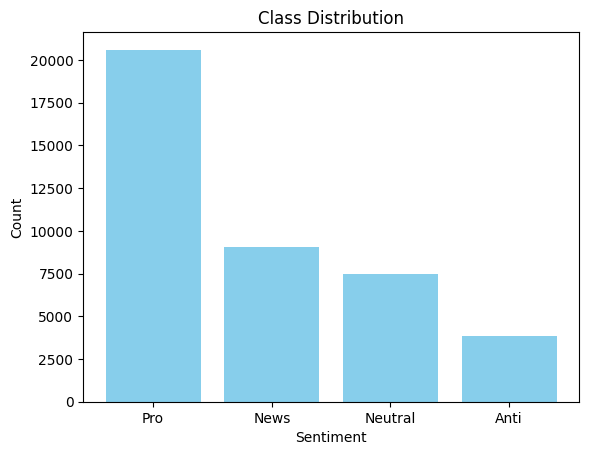

In [97]:
# Plot class distribution
plt.bar(class_distribution.index, class_distribution['Count'], color = 'skyblue')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

We can notice that amongst this dataset, more than half of the tweeter message are classified as **Pro** which means that half of the tweets supports the belief of man-made climate change. 